In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas_profiling
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score





In [2]:
df1=pd.read_csv('traintp2.csv')
df2=pd.read_csv('testtp2.csv')
pd.set_option('max_columns',30)

In [3]:
df1.head()
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null object
dtypes: floa

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df1.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# PROFILE REPORT

In [5]:
pandas_profiling.ProfileReport(df1)

Number of variables,22
Number of observations,32978
Total Missing (%),0.0%
Total size in memory,5.5 MiB
Average record size in memory,176.0 B
Numeric,9
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [6]:
            
for i in df1.columns:
    print("###############################\n")
    print(i,'\n')
    if df1[i].dtype == 'object':
        print(df1[i].value_counts())
    else:
        print(df1[i].describe())

###############################

id 

count    32978.000000
mean     20620.844533
std      11878.692749
min          0.000000
25%      10346.250000
50%      20649.500000
75%      30887.750000
max      41187.000000
Name: id, dtype: float64
###############################

age 

count    32978.000000
mean        40.042392
std         10.466038
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64
###############################

job 

admin.           8384
blue-collar      7416
technician       5434
services         3154
management       2334
retired          1392
entrepreneur     1151
self-employed    1139
housemaid         835
unemployed        789
student           692
unknown           258
Name: job, dtype: int64
###############################

marital 

married     19972
single       9249
divorced     3694
unknown        63
Name: marital, dtype: int64
###############################

education 

unive

In [7]:
df=df1.copy()
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.show()

# CATEGORICAL DATA

In [8]:
df1['job'].dtype.name
df1.columns
for i in df1.columns:
    if df1[i].dtype.name == 'object':
        print(i,' - ',df1[i].unique(),'\n')
        
        


job  -  ['housemaid' 'services' 'blue-collar' 'technician' 'retired' 'management'
 'self-employed' 'admin.' 'unknown' 'entrepreneur' 'unemployed' 'student'] 

marital  -  ['married' 'single' 'divorced' 'unknown'] 

education  -  ['basic.4y' 'high.school' 'basic.9y' 'unknown' 'professional.course'
 'basic.6y' 'university.degree' 'illiterate'] 

default  -  ['no' 'unknown' 'yes'] 

housing  -  ['no' 'yes' 'unknown'] 

loan  -  ['no' 'yes' 'unknown'] 

contact  -  ['telephone' 'cellular'] 

month  -  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week  -  ['mon' 'tue' 'wed' 'thu' 'fri'] 

poutcome  -  ['nonexistent' 'failure' 'success'] 

y  -  ['no' 'yes'] 



# CHECKING FOR RELN BETWEEN FEATURE AND PREDICTION

# JOB VS y

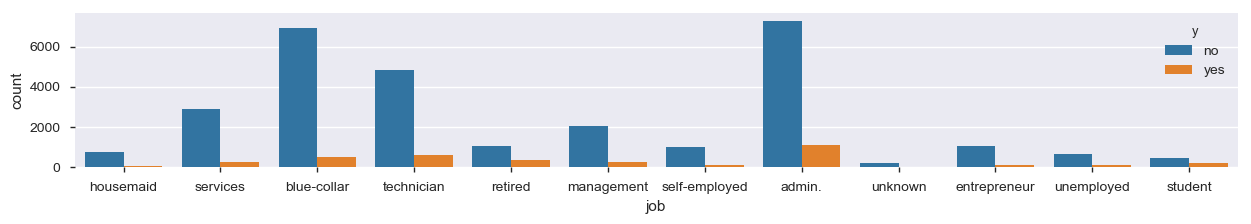

In [9]:
#print(df1.groupby('y')['job'].value_counts())
sns.countplot(df1.job, hue = df1.y)
plt.gcf().set_size_inches(15, 2)

# Marital vs y

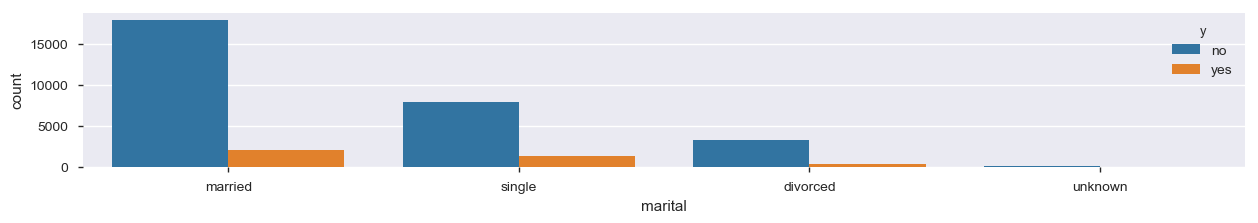

In [10]:
sns.countplot(df1.marital, hue = df1.y)
plt.gcf().set_size_inches(15, 2)

# Education vs y

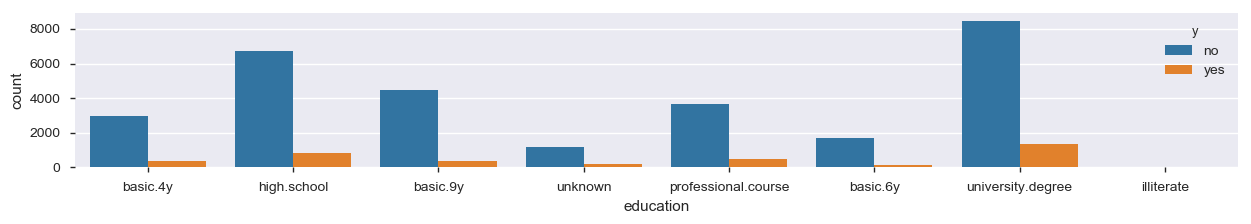

In [11]:
sns.countplot(df1.education, hue = df1.y)
plt.gcf().set_size_inches(15, 2)

# Contact vs y

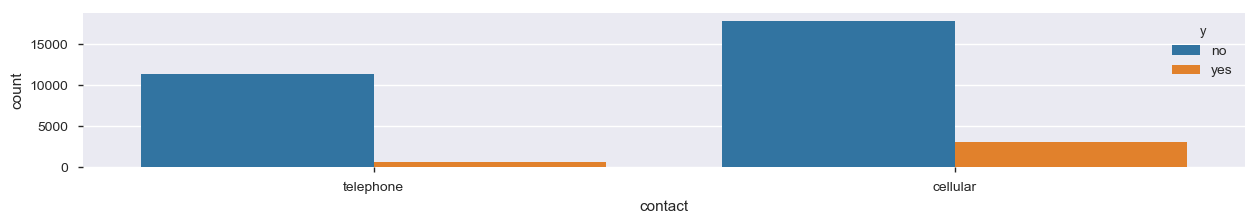

In [12]:
sns.countplot(df1.contact, hue = df1.y)
plt.gcf().set_size_inches(15, 2)

# Month vs y 

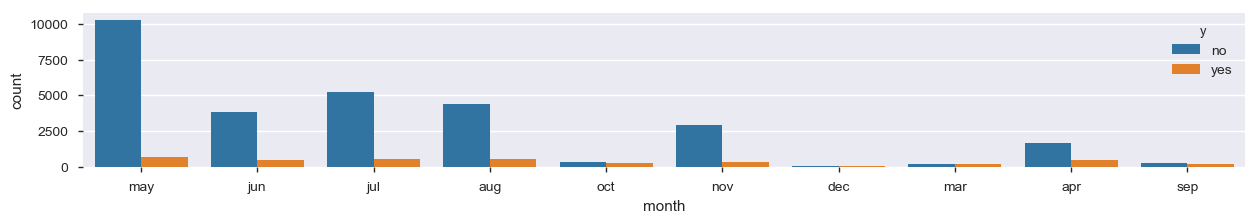

In [13]:
sns.countplot(df1.month, hue = df1.y)
plt.gcf().set_size_inches(15, 2)

# DAY vs y

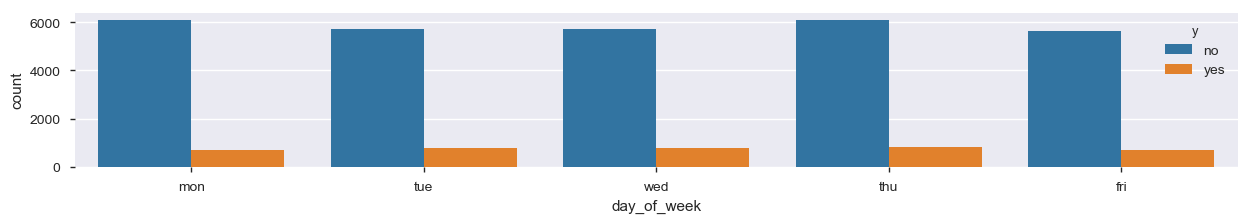

In [14]:
sns.countplot(df1.day_of_week, hue = df1.y)
plt.gcf().set_size_inches(15, 2)

# poutcome vs y

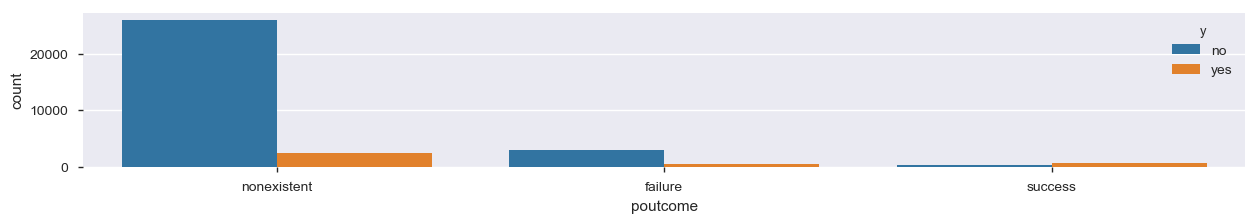

In [15]:
sns.countplot(df1.poutcome, hue = df1.y)
plt.gcf().set_size_inches(15, 2)

In [16]:
'''df1['y']=LabelEncoder().fit_transform(df1['y'])
df1['default'] = LabelEncoder().fit_transform(df1['default'])
df1['housing'] = LabelEncoder().fit_transform(df1['housing'])
df1['loan'] = LabelEncoder().fit_transform(df1['loan'])
df2['default'] = LabelEncoder().fit_transform(df2['default'])
df2['housing'] = LabelEncoder().fit_transform(df2['housing'])
df2['loan'] = LabelEncoder().fit_transform(df2['loan'])

'''

"df1['y']=LabelEncoder().fit_transform(df1['y'])\ndf1['default'] = LabelEncoder().fit_transform(df1['default'])\ndf1['housing'] = LabelEncoder().fit_transform(df1['housing'])\ndf1['loan'] = LabelEncoder().fit_transform(df1['loan'])\ndf2['default'] = LabelEncoder().fit_transform(df2['default'])\ndf2['housing'] = LabelEncoder().fit_transform(df2['housing'])\ndf2['loan'] = LabelEncoder().fit_transform(df2['loan'])\n\n"

# Num Corr

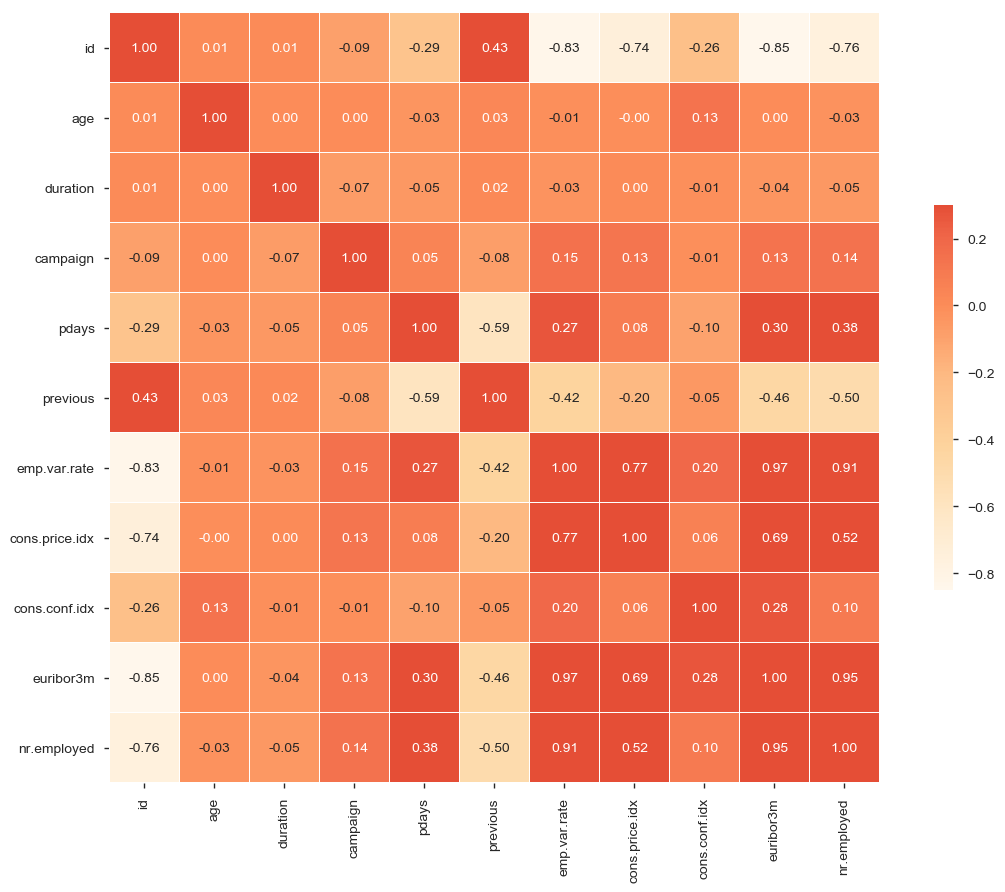

In [17]:
corr = df1.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='OrRd')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

# since np.employes is similar to 'emp.var.rate', 'euribor3m','cons.price.idx'

In [18]:
 df1.drop(['emp.var.rate', 'euribor3m','cons.price.idx','id'], axis=1).head()  ####since np.employes is similar

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,-36.4,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,-36.4,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,-36.4,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,-36.4,5191.0,no
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,-36.4,5191.0,no


In [19]:
g = df1.groupby( "y")

for i in ['age','duration','nr.employed']:
    print(i,'\n',g[i].describe(),'\n')
    print('#####################################')
        

age 
        count       mean        std   min   25%   50%   75%   max
y                                                               
no   29241.0  39.920523   9.947714  17.0  32.0  38.0  47.0  95.0
yes   3737.0  40.995986  13.833061  18.0  31.0  37.0  50.0  98.0 

#####################################
duration 
        count        mean         std   min    25%    50%    75%     max
y                                                                      
no   29241.0  221.453302  207.483861   0.0   95.0  164.0  280.0  4918.0
yes   3737.0  551.099545  401.736116  37.0  254.0  445.0  740.0  4199.0 

#####################################
nr.employed 
        count         mean        std     min     25%     50%     75%     max
y                                                                           
no   29241.0  5176.151226  64.573566  4963.6  5099.1  5195.8  5228.1  5228.1
yes   3737.0  5094.884078  87.756547  4963.6  5017.5  5099.1  5191.0  5228.1 

###############################

# Grouping education into more compact features

In [20]:
data=df1

data.education[data.education=='basic.4y']='Basic'
data.education[data.education=='basic.6y']='Basic'
data.education[data.education=='basic.9y']='Basic'
data.education[data.education=='high.school']='High School'
data.education[data.education=='illiterate']='Illiterate'
data.education[data.education=='professional.course']='Professional Course'
data.education[data.education=='university.degree']='University Degree'
data.education[data.education=='unknown']='Unknown'


#data2.head()



C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a Da

In [21]:
data2=df2

cat_col=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for col in cat_col:
    data=pd.concat([data.drop(col,axis=1),pd.get_dummies(data[col],prefix=col,prefix_sep='-',drop_first=True)],axis=1)
    
data['y']=LabelEncoder().fit_transform(data['y'])
    
data.head()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job-blue-collar,job-entrepreneur,job-housemaid,...,month-aug,month-dec,month-jul,month-jun,month-mar,month-may,month-nov,month-oct,month-sep,day_of_week-mon,day_of_week-thu,day_of_week-tue,day_of_week-wed,poutcome-nonexistent,poutcome-success
0,0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [22]:
X=data.drop('y',axis=1)
#X=d
y=data['y']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Log Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print(accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))



0.9145947038609258
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8840
           1       0.66      0.40      0.50      1054

    accuracy                           0.91      9894
   macro avg       0.80      0.69      0.73      9894
weighted avg       0.90      0.91      0.91      9894



# GB Classifier

In [25]:

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



0.9205579138872043
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8840
           1       0.65      0.54      0.59      1054

    accuracy                           0.92      9894
   macro avg       0.80      0.75      0.77      9894
weighted avg       0.92      0.92      0.92      9894



# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9203557711744491
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8840
           1       0.66      0.51      0.58      1054

    accuracy                           0.92      9894
   macro avg       0.80      0.74      0.77      9894
weighted avg       0.91      0.92      0.92      9894



# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.8812411562563169
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8840
           1       0.46      0.60      0.52      1054

    accuracy                           0.88      9894
   macro avg       0.70      0.76      0.73      9894
weighted avg       0.90      0.88      0.89      9894



# Stochastic Gradient Descent

In [28]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(X_train, y_train)
y_pred=sgd.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9085304224782697
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8840
           1       0.58      0.50      0.54      1054

    accuracy                           0.91      9894
   macro avg       0.76      0.73      0.74      9894
weighted avg       0.90      0.91      0.91      9894



# SVM

In [29]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=0.025,random_state=101,verbose=1)
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[LibSVM]0.9097432787548009
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8840
           1       0.63      0.37      0.47      1054

    accuracy                           0.91      9894
   macro avg       0.78      0.67      0.71      9894
weighted avg       0.90      0.91      0.90      9894



# Gradient Boost CLF works best for the dataset